# Removing Mux Scans From a Sequencing Summary File

This jupyter notebook shows how to remove mux scans from a sequencing summary file, and saves it back.

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display

# modify as needed
# %cd "/../../ont_project"

from simreaduntil.seqsum_tools.seqsum_preprocessing import sort_and_clean_seqsum_df
from simreaduntil.seqsum_tools.seqsum_plotting import plot_channels_over_time
from simreaduntil.seqsum_tools.mux_scan_detection import check_mux_scan_windows, find_mux_scans, plot_mux_scans, remove_mux_scans, remove_mux_scans_from_file, get_seqsum_filename_with_removed_mux_scans

/bin/sh: lscpu: command not found


## In One Go

In [2]:
# adapt paths as necessary
sequencing_summary_file = Path("runs/data/20190809_zymo_seqsum.txt")
seqsum_df_new, mux_scan_boundaries = remove_mux_scans_from_file(sequencing_summary_file, save_filename=get_seqsum_filename_with_removed_mux_scans(sequencing_summary_file))

Checking mux scan window: 100%|██████████| 32/32 [00:09<00:00,  3.44it/s]


Saving to '/Users/maximilianmordig/Desktop/ont_sequencing/data/sequencing_summaries/uncalled/20190809_zymo_seqsum_no_mux_scans.csv'


## Intermediate Steps
This shows the intermediate steps, if you want to take a look at where the mux scans are detected.

In [2]:
# adapt paths as necessary
sequencing_summary_file = Path("/Users/maximilianmordig/Desktop/ont_sequencing/data/sequencing_summaries/uncalled/20190809_zymo_seqsum.txt")
df_read = pd.read_csv(sequencing_summary_file, sep="\t")
seqsum_df = sort_and_clean_seqsum_df(df_read, min_gap_duration=None)#, min_gap_duration=0.05)

# seqsum_df = df_read
seqsum_df.head(3)

filename  \
2198924  FAL19529_c9b60df33e0a0e62b4dcbd52617a78ac793e7...   
2197706  FAL19529_c9b60df33e0a0e62b4dcbd52617a78ac793e7...   
2197269  FAL19529_c9b60df33e0a0e62b4dcbd52617a78ac793e7...   

                                      read_id  \
2198924  5c783357-dccb-4927-a229-f2d4c1c64196   
2197706  53328a6a-baf7-4e6a-8ca2-960e74c0a89c   
2197269  d9d2b08a-956d-4b87-893d-149ea1865080   

                                           run_id  batch_id  channel  mux  \
2198924  c9b60df33e0a0e62b4dcbd52617a78ac793e7704       550        1    1   
2197706  c9b60df33e0a0e62b4dcbd52617a78ac793e7704       550        1    2   
2197269  c9b60df33e0a0e62b4dcbd52617a78ac793e7704       550        1    3   

         start_time  duration  num_events  passes_filtering  template_start  \
2198924   19.522751   1.65525        3310              True       19.683250   
2197706   46.210499   0.63675        1273              True       46.292500   
2197269   66.711746   1.88950        3779              True       66.931252   

         num_events_template  template_duration  sequence_length_template  \
2198924                 2989            1.49475                       588   
2197706                 1109            0.55475                       177   
2197269                 3340            1.67000                       679   

         mean_qscore_template  strand_score_template  median_template  \
2198924             13.300619                    0.0        88.981461   
2197706             13.870803                    0.0        89.155251   
2197269             12.993888                    0.0        83.420120   

         mad_template   end_time  
2198924      9.384764  21.178001  
2197706     10.253723  46.847249  
2197269      9.732347  68.601246

In [3]:
mux_scan_windows = find_mux_scans(seqsum_df["start_time"].values, seqsum_df["end_time"].values, seqsum_df["mux"].values)

check_mux_scan_windows(seqsum_df, mux_scan_windows)

# window lengths, lengths of regions: noscan - muxscan - noscan - muxscan - noscan - ...
mux_scan_windows, np.diff(mux_scan_windows, axis=1).flatten(), np.diff(mux_scan_windows.flatten())

Checking mux scan window: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]


(array([[0.00000000e+00, 1.09024246e+02],
        [5.50915696e+03, 5.62064502e+03],
        [1.10209072e+04, 1.11318477e+04],
        [1.65320797e+04, 1.66426484e+04],
        [2.20428628e+04, 2.21533438e+04],
        [2.75536006e+04, 2.76641152e+04],
        [3.30643399e+04, 3.31745977e+04],
        [3.85745838e+04, 3.86846719e+04],
        [4.40848905e+04, 4.41941641e+04],
        [4.95943064e+04, 4.97044844e+04],
        [5.51045769e+04, 5.52146016e+04],
        [6.06147888e+04, 6.07241797e+04],
        [6.61242757e+04, 6.62331406e+04],
        [7.16332295e+04, 7.17426719e+04],
        [7.71429159e+04, 7.72519609e+04],
        [8.26521083e+04, 8.27615078e+04],
        [8.81616036e+04, 8.82708984e+04],
        [9.36708768e+04, 9.37797500e+04],
        [9.91798317e+04, 9.92891016e+04],
        [1.04689208e+05, 1.04798602e+05],
        [1.10198620e+05, 1.10307875e+05],
        [1.15707934e+05, 1.15817078e+05],
        [1.21217150e+05, 1.21325961e+05],
        [1.26726076e+05, 1.2683453

Plotting channels: 100%|██████████| 486/486 [00:38<00:00, 12.65it/s]


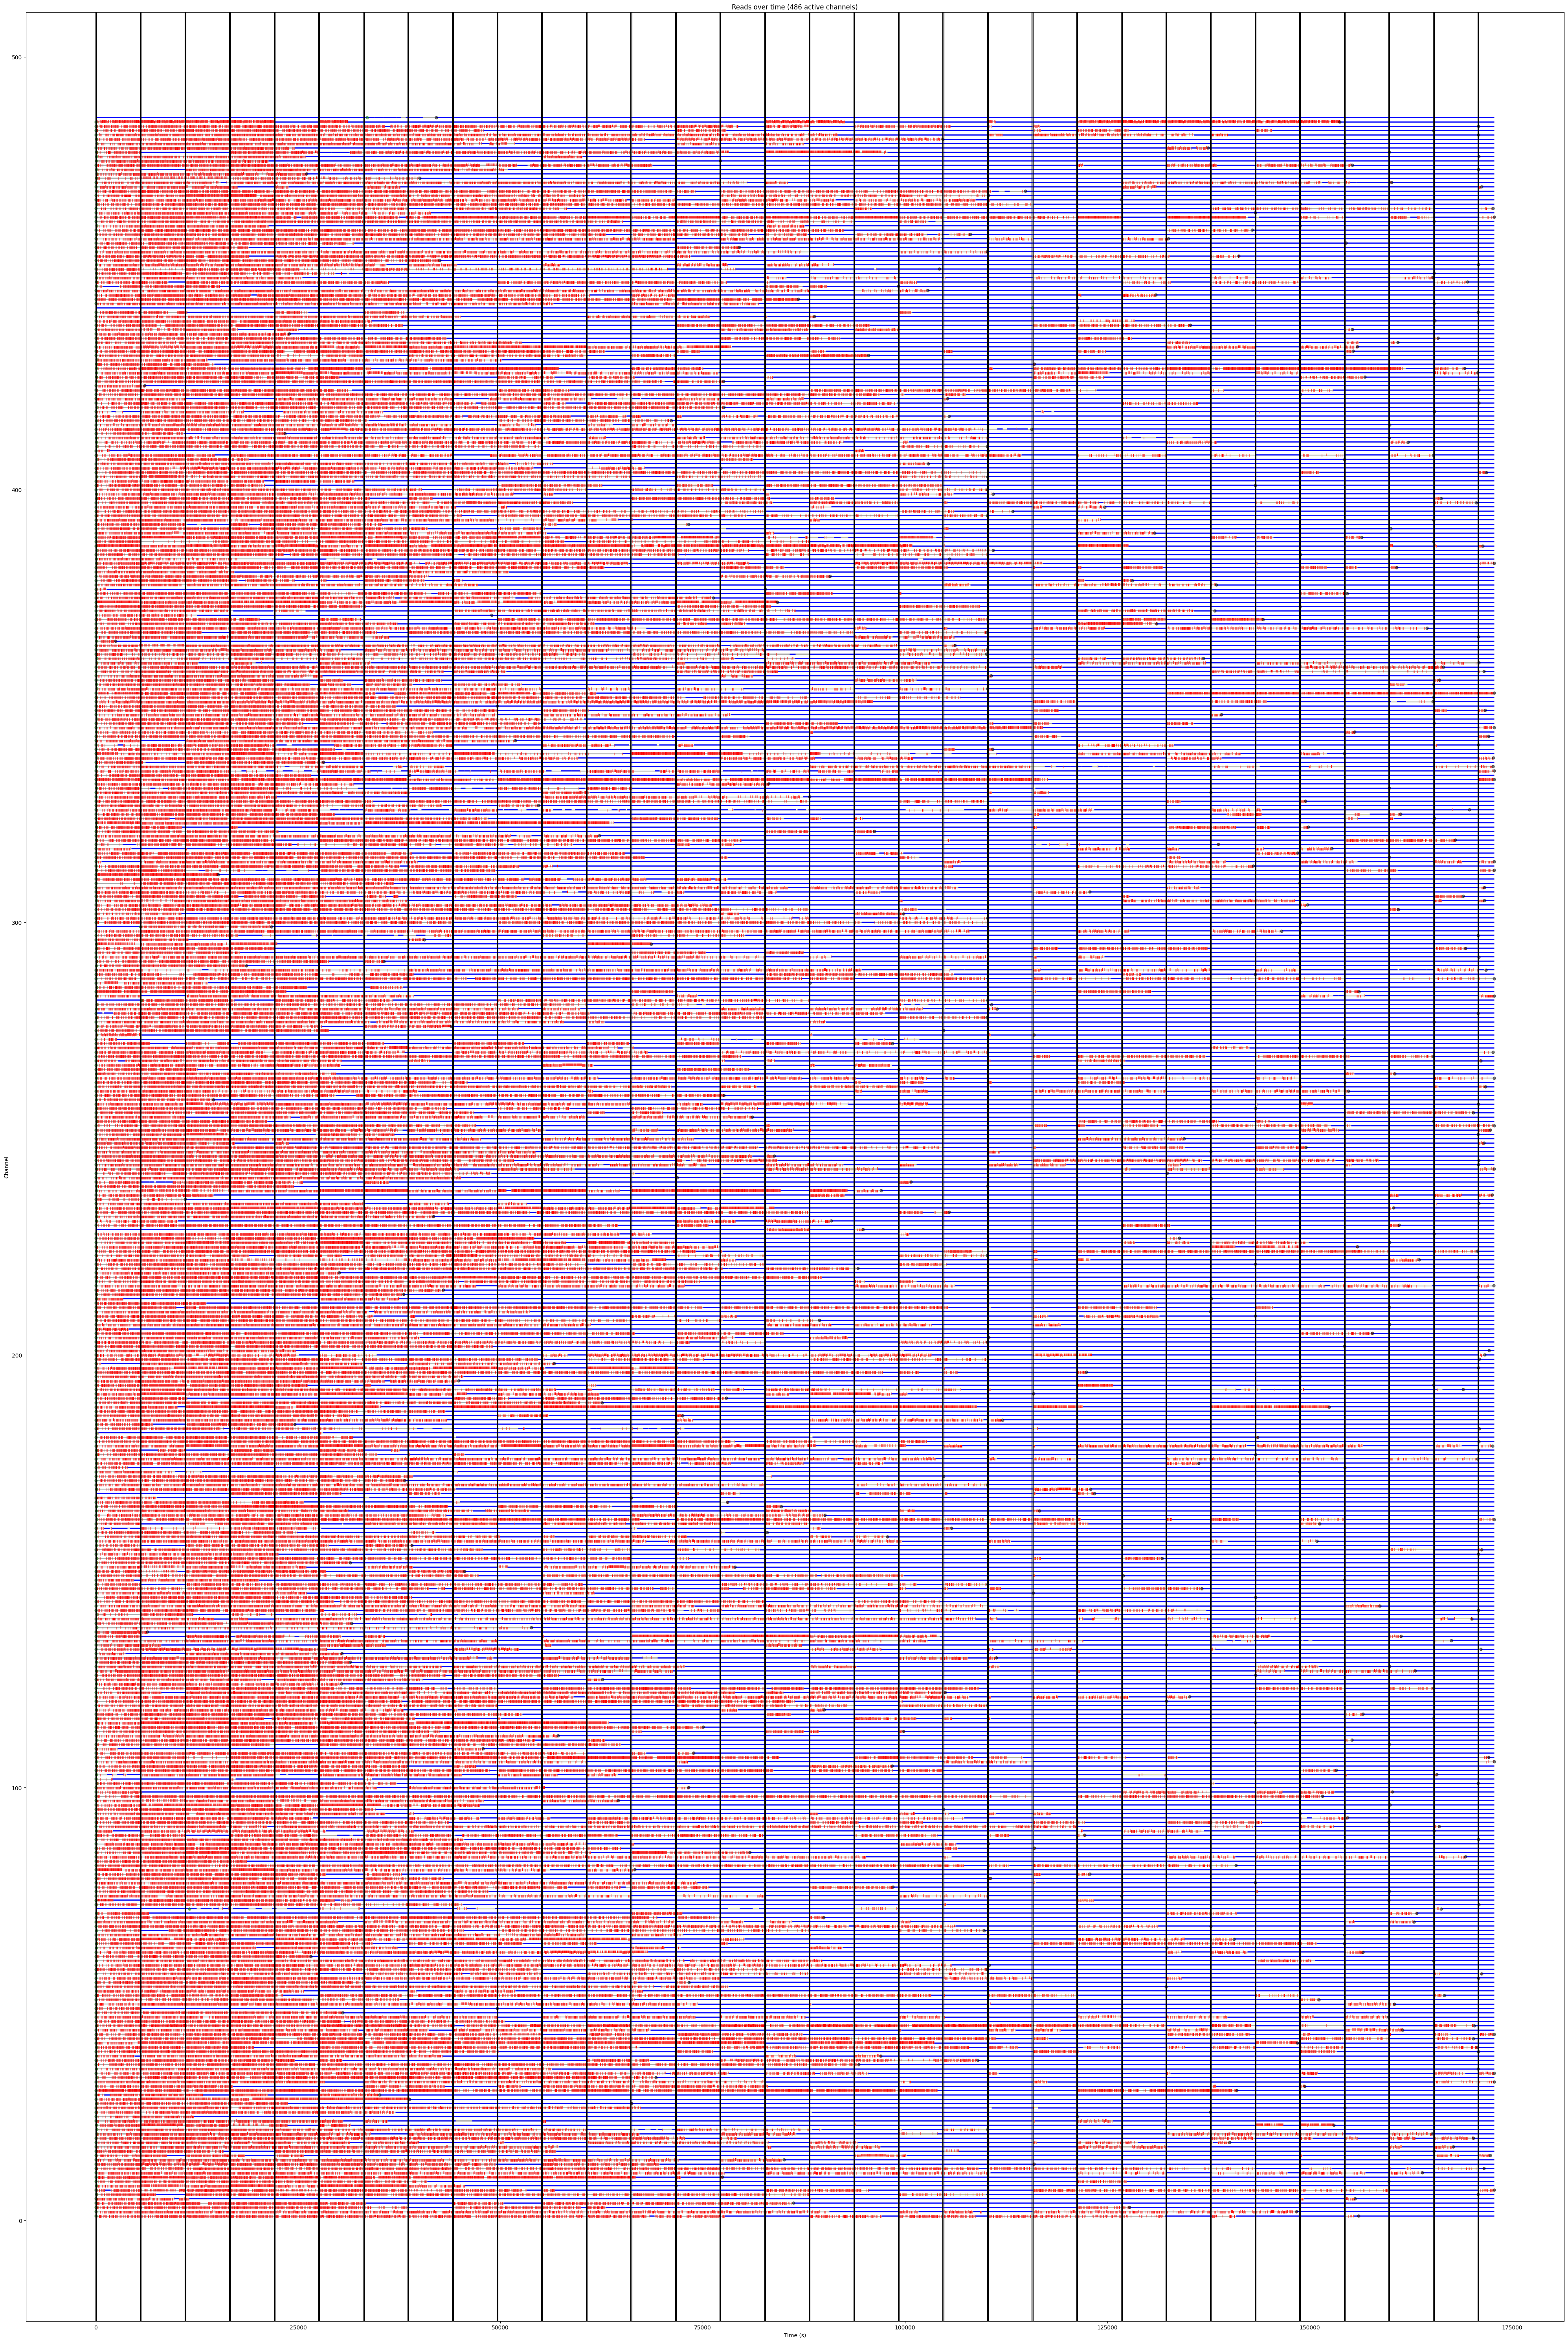

In [4]:
ax = plot_channels_over_time(seqsum_df)
plot_mux_scans(mux_scan_windows, ax=ax)

In [4]:
seqsum_df_new, mux_scan_boundaries = remove_mux_scans(seqsum_df, mux_scan_windows)

Plotting channels: 100%|██████████| 486/486 [01:14<00:00,  6.52it/s]


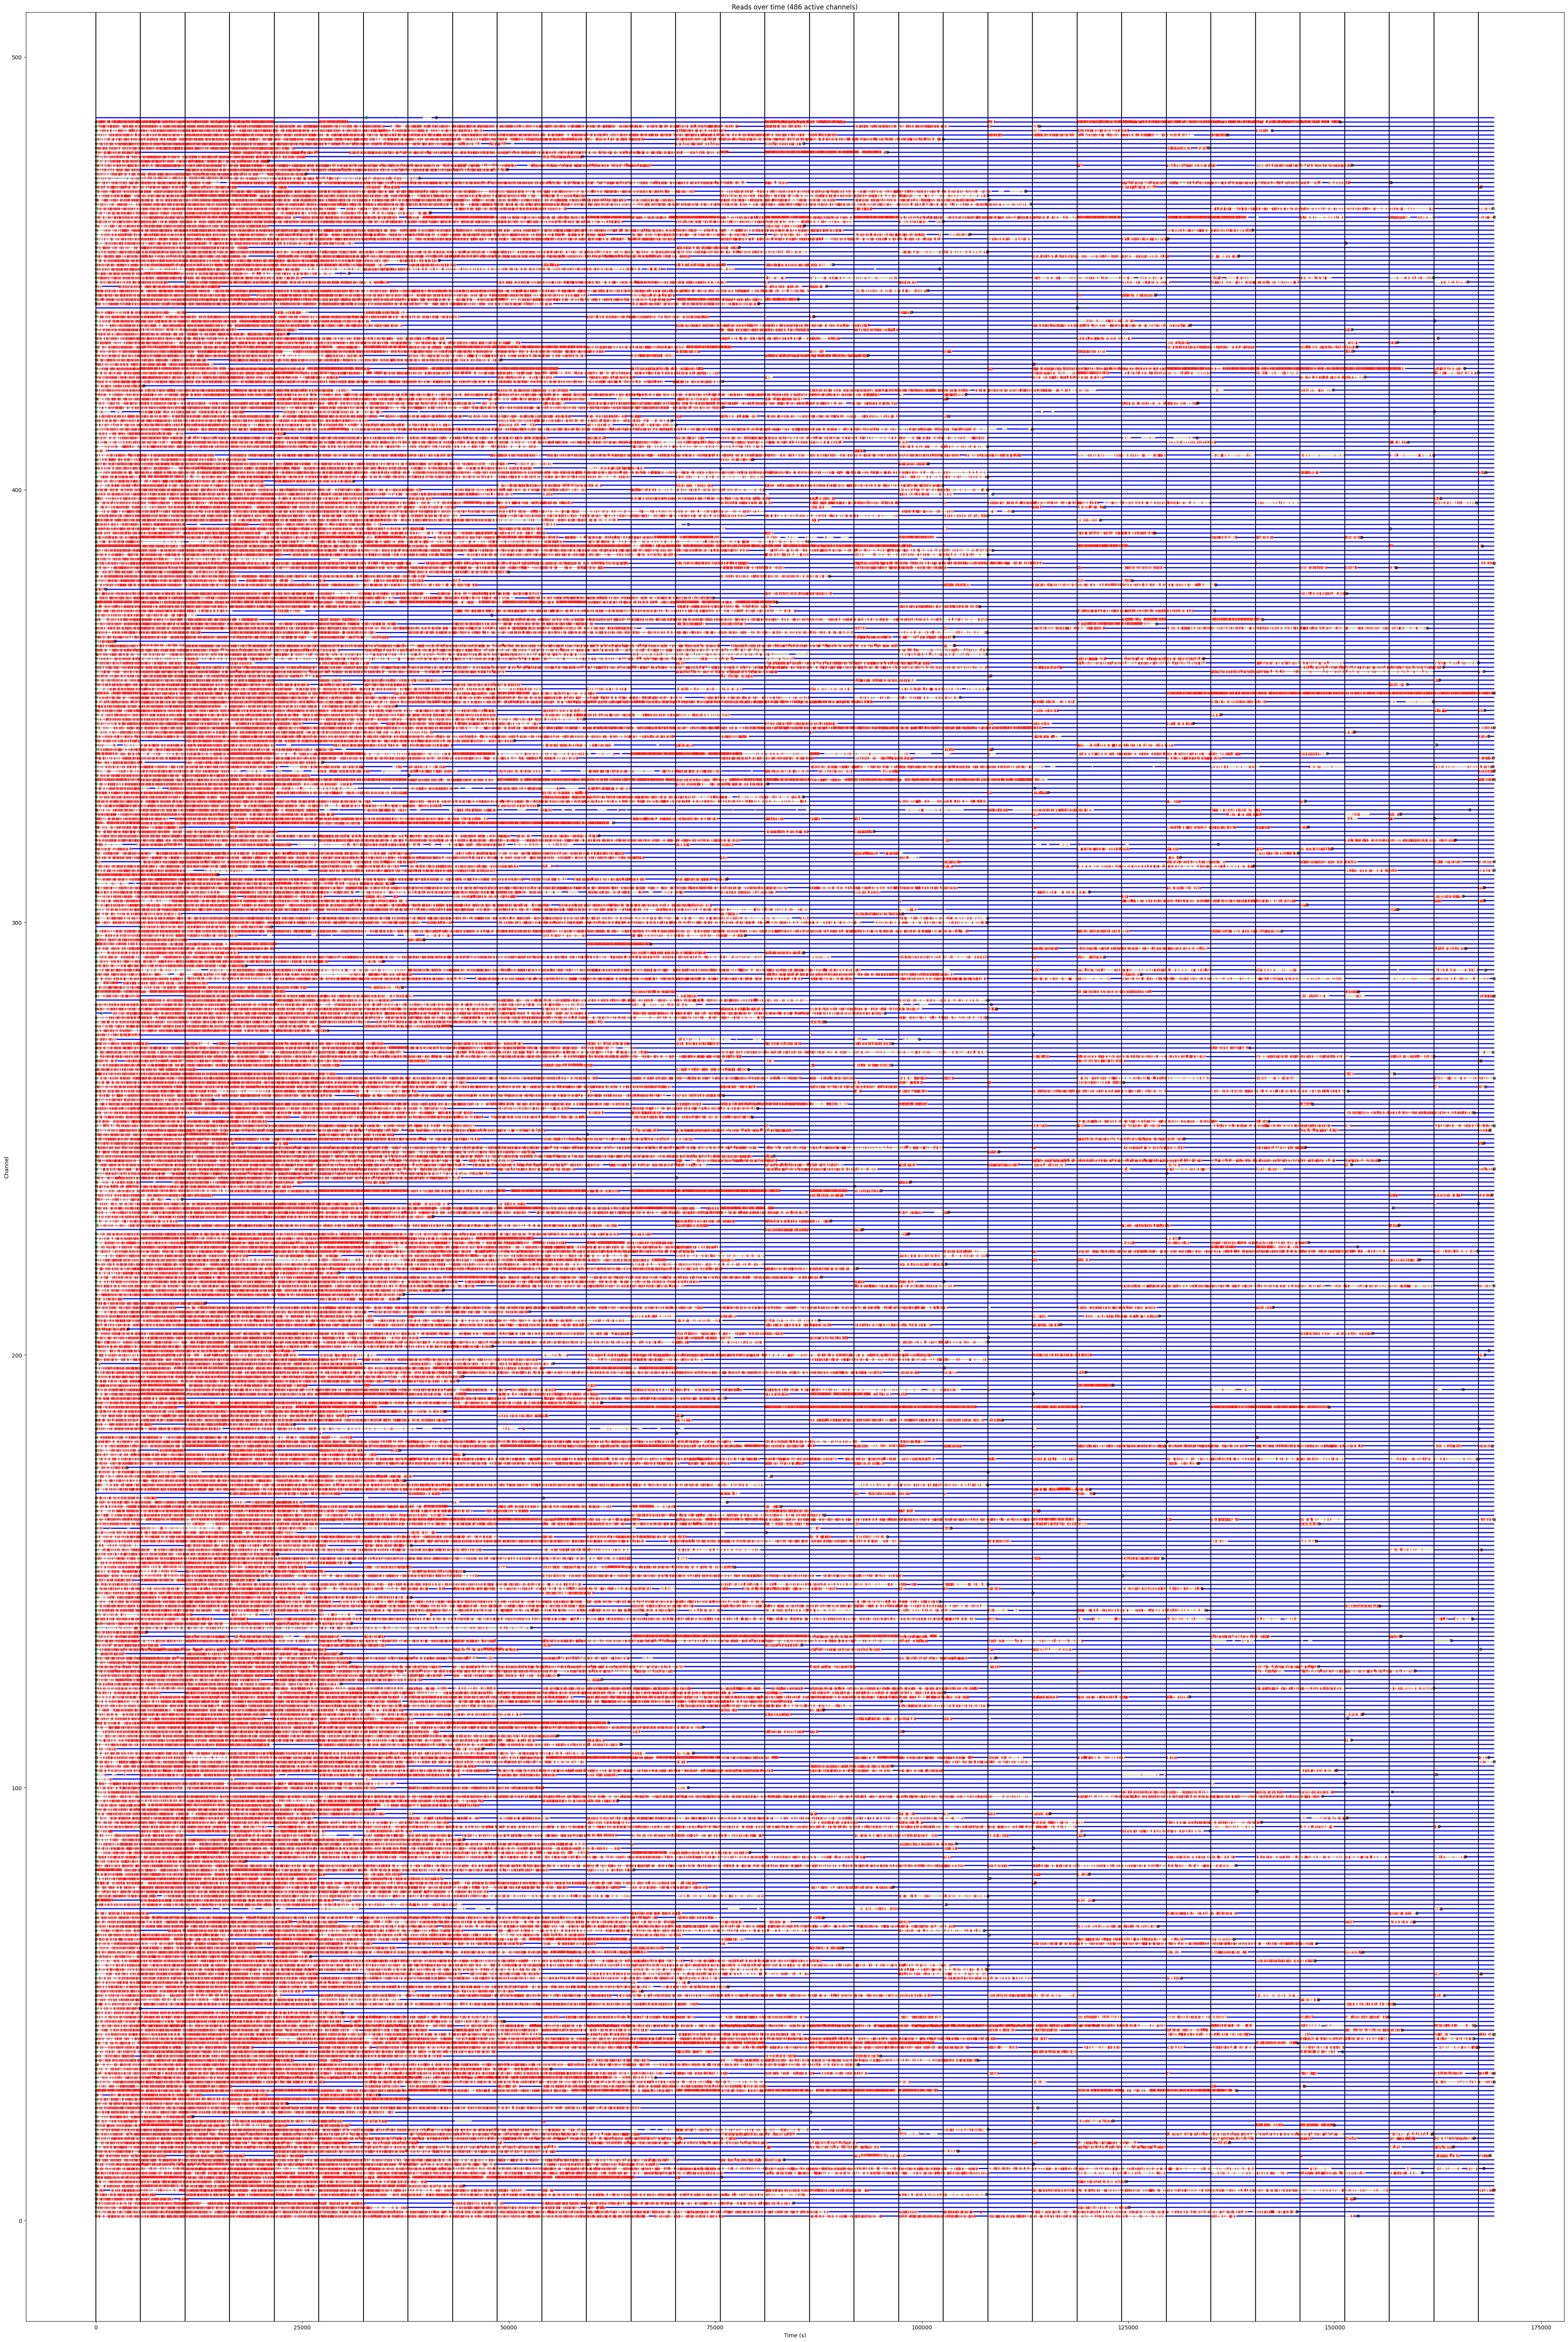

In [5]:
ax = plot_channels_over_time(seqsum_df_new)
for time in mux_scan_boundaries:
    ax.axvline(time, color="black")

In [1]:
df_single = seqsum_df_new[seqsum_df_new["channel"] == 1]
fig, ax = plt.subplots()
n_channels = 20
for (i, (channel, df_single)) in enumerate(seqsum_df_new.groupby("channel", observed=True)):
    if i >= n_channels:
        break
    ax.plot(df_single["start_time"], df_single["nb_scans_before"], marker=".", markersize=1, linestyle="none", label=channel)
    # ax.plot(df_single["start_time"], df_single["nb_scans_before"] + i/n_channels, marker=".", markersize=1, linestyle="none", label=channel)
ax.legend()
ax.set_xlabel("start time")
ax.set_ylabel("nb mux scans before")
ax.set_title("nb mux scans vs time over channels")

NameError: name 'seqsum_df_new' is not defined

In [6]:
# new_filename = sequencing_summary_file.parent / (sequencing_summary_file.stem + "_no_mux_scans.csv")
# print(f"Saving to '{new_filename}'")
# seqsum_df_new.to_csv(new_filename, sep="\t", index=False)

Saving to '/Users/maximilianmordig/Desktop/ont_sequencing/data/sequencing_summaries/uncalled/20190809_zymo_seqsum_no_mux_scans.csv'
